In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [243]:
utk=pd.read_csv('/home/utkarsh/Desktop/quikr_car.csv')

In [244]:
utk.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [245]:
utk.shape

(892, 6)

In [246]:
utk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [247]:
backup=utk.copy()

In [248]:
utk=utk[utk['year'].str.isnumeric()]

In [249]:
utk['year']=utk['year'].astype('int')

In [250]:
utk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [251]:
utk=utk[utk['Price']!='Ask For Price']

In [252]:
utk['Price']=utk['Price'].str.replace(',','').astype('int')

In [253]:
utk['kms_driven']=utk['kms_driven'].str.split().str.get(0).str.replace(',','')

In [254]:
utk=utk[utk['kms_driven'].str.isnumeric()]

In [255]:
utk['kms_driven']=utk['kms_driven'].astype(int)

In [256]:
utk=utk[~utk['fuel_type'].isna()]

In [257]:
utk.shape


(816, 6)

In [258]:
utk.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [259]:
utk['name']=utk['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [260]:
utk=utk.reset_index(drop=True)

In [261]:
utk.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [262]:
utk.to_csv('Cleaned_Car_data.csv')

In [263]:
utk=utk.iloc[:,0:]

In [264]:
utk.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [265]:
utk=utk[utk['Price']<600000]

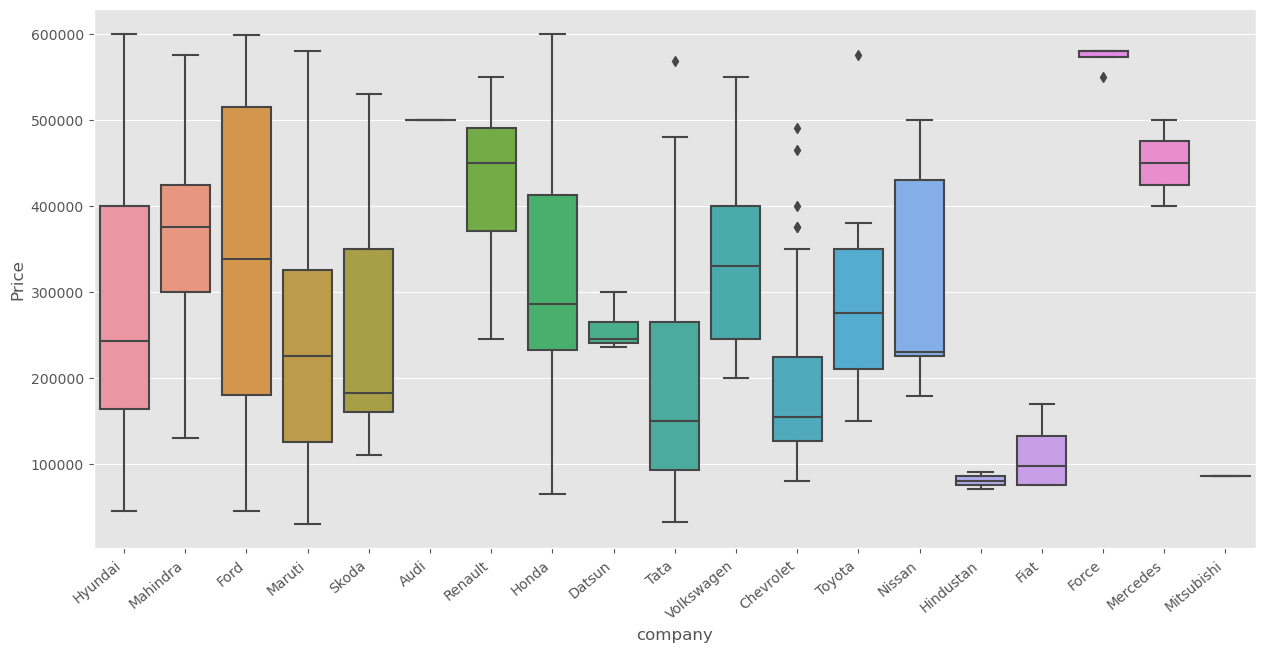

In [266]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=utk)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/tmp/ipykernel_4012/2122836921.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


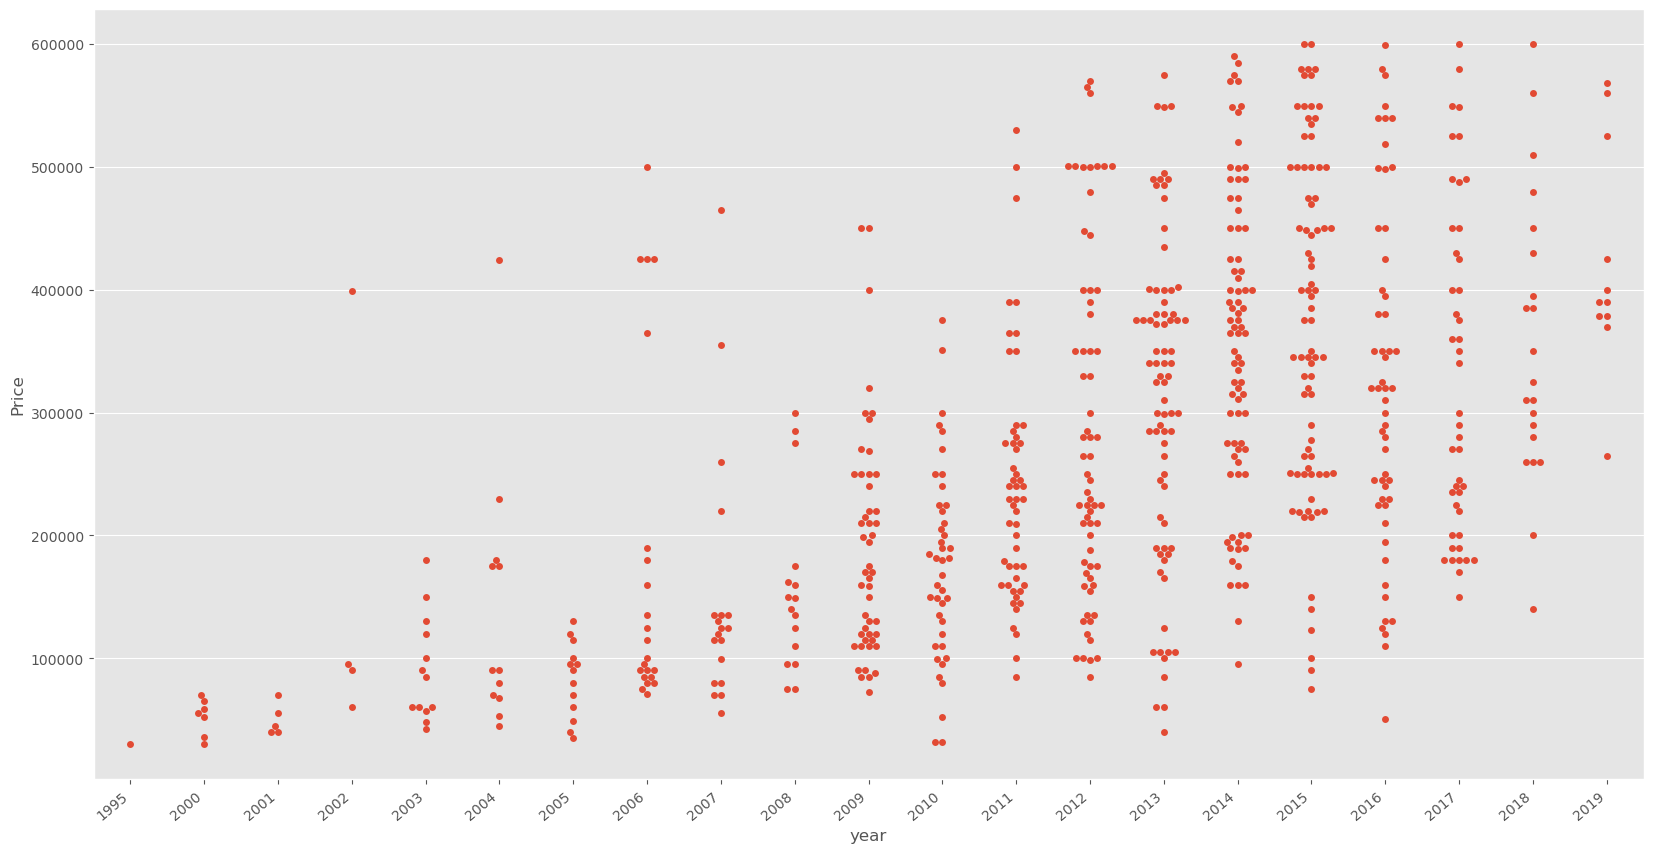

In [267]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=utk)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/home/utkarsh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


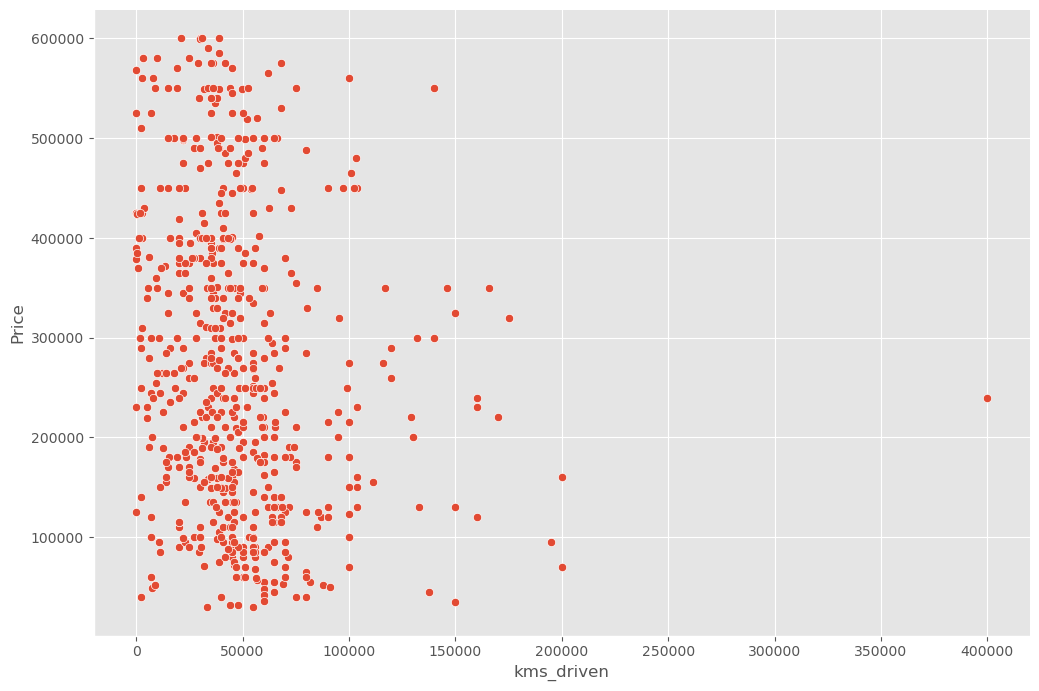

In [268]:
sns.relplot(x='kms_driven',y='Price',data=utk,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

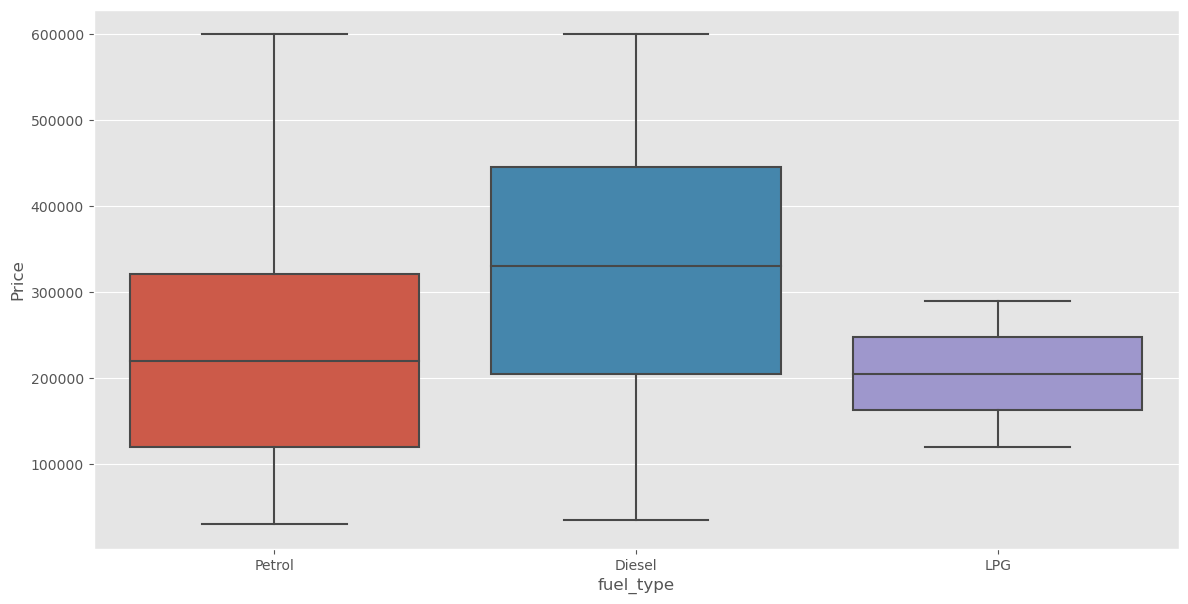

In [269]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=utk)

/home/utkarsh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


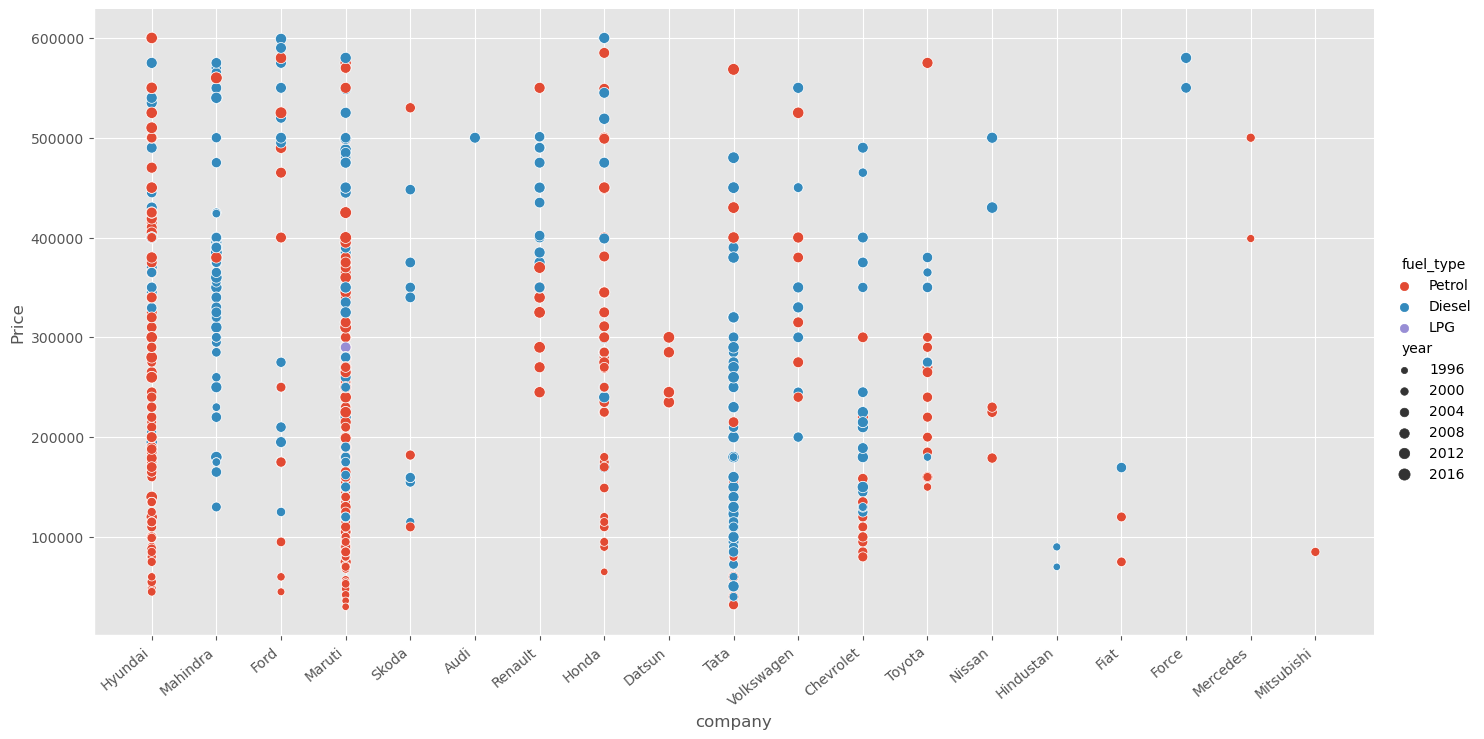

In [270]:
ax=sns.relplot(x='company',y='Price',data=utk,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [273]:
X=utk[['name','company','year','kms_driven','fuel_type']]
y=utk['Price']

In [274]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [275]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [276]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [277]:
lr=LinearRegression()

In [278]:
pipe=make_pipeline(column_trans,lr)

In [279]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q7', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet S...
       'Volkswagen Vento Highline', 'Volkswagen Vento Konekt'],
      dtype=object),
                                                                            array(['Audi', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [280]:
y_pred=pipe.predict(X_test)
y_pred

array([332639.77393038, 117940.36306704, 375274.49769871, 324010.95790242,
       177014.50914953, 158319.11527705, 279825.4467827 , 229976.57187226,
       259600.18098134, 208155.02683147, 180214.08430588, 220296.12851235,
       157832.62020534, 295445.82202961, 575795.30130398,  91857.77007684,
       -59725.71164019, 516863.86735632, 220525.03830047, 418530.82623198,
       307646.95913198, 501538.63583286,  68054.15022169, 160747.46666583,
       -43025.43518927, 196106.91641851, 168531.41867276, 287764.24390502,
       147901.85459492, 274219.72990646,  26352.91708948, 130881.20796612,
       222741.705564  , 198034.70855312, 196631.97054625, 250360.92926732,
       184537.1905861 , 201866.6880099 , 189767.10821726, 241082.16093026,
       371411.79838226, 218046.03676655, 504100.81049579,  88467.51638786,
       177118.86984888, 173596.76146763, 266334.51332244, 401657.83568944,
       222853.70362909, 215167.94185741, 254687.88196427, 332027.86095736,
       386962.93612898, 1

In [281]:
r2_score(y_test,y_pred)

0.7046473368666899

In [282]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [283]:
np.argmax(scores)

551

In [284]:
scores[np.argmax(scores)]

0.8478244732248514

In [285]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([382768.31891238])

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8478244732248514

In [287]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [288]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([370413.17662276])

In [289]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi Q7', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Titanium',
       'Ford EcoSport Trend', 'Ford Fiesta', 'Ford Fiesta SXi',
       'Ford Figo', 'Ford Figo Diesel', 'Ford Figo Duratorq',
       'Ford Figo Petrol', 'Ford Fusion 1.4', 'Ford Ikon 1.3',
       'Ford Ikon 1.6', 'Hindustan Motors Ambassador', 'Honda Accord',
       'Honda Amaze', 'Honda Amaze 1.2', 'Honda Amaze 1.5', 'Honda Brio',
       'Honda Brio V', 'Honda Brio VX', 'Honda